

---
# MEMBUAT MODEL DATA IRIS DENGAN METODE KNN 


In [ ]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB

In [ ]:
%cd /content/drive/MyDrive/datamining/tugas

/content/drive/MyDrive/datamining/tugas


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# link data 
dataset_url = 'https://raw.githubusercontent.com/nuskhatulhaqqi/data_mining/main/iris_data.csv'

# membaca data link
df = pd.read_csv(dataset_url)
df

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,3
146,6.3,2.5,5.0,1.9,3
147,6.5,3.0,5.2,2.0,3
148,6.2,3.4,5.4,2.3,3


In [ ]:
# MEMBAGI DATA UJI DAN DATA TEST
X=df.iloc[:,0:4].values
y=df.iloc[:,4].values

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

# METODE KNN

In [ ]:
#KNN DENGAN TUNING TETANGGA TERDEKAT 9

knn_clf = KNeighborsClassifier(n_neighbors=9)
knn_clf.fit(X_train,y_train)

y_pred = knn_clf.predict(X_test)
round(accuracy_score(y_test,y_pred)* 100, 2)

97.78

In [ ]:
#PICKLE UNTUK MEMBUAT MODEL

import pickle

with open('knnA_pickle','wb') as r:
    pickle.dump(knn_clf,r)

In [ ]:
# MEMANGGIL DATA MODEL
with open('knnA_pickle','rb') as r:
    knnp = pickle.load(r)

In [ ]:
# CEK HASIL MODEL
dataArray = [4,3,2,1]
data1=[5.9,3.0,5.1,1.8]
Y_pred = knnp.predict([dataArray])
Y_pred
#round(accuracy_score(y_test,y_pred),3)

array([1])

# METODE NAIVE BAYES

In [ ]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
YY_pred = gaussian.predict(X_test)
accuracy_nb=round(accuracy_score(y_test,YY_pred)* 100, 2)
accuracy_nb

100.0

In [ ]:
#PICKLE UNTUK MEMBUAT MODEL

import pickle

with open('nb_pickle','wb') as r:
    pickle.dump(gaussian,r)



In [ ]:
# MEMANGGIL DATA MODEL
with open('nb_pickle','rb') as r:
    NBP = pickle.load(r)


In [ ]:
# CEK HASIL MODEL
dataArray = [4,3,2,1]
data1=[5.9,3.0,5.1,1.8]	
Yy_pred = NBP.predict([data1])
Yy_pred

array([3])

# DECISION TREE

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train,y_train)

hasil_prediksi = model.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy_dt=round(accuracy_score(y_test,hasil_prediksi)* 100, 2)
accuracy_dt

97.78

In [ ]:
#PICKLE UNTUK MEMBUAT MODEL

import pickle

with open('dt_pickle','wb') as r:
    pickle.dump(model,r)

In [ ]:
# import matplotlib.pyplot as plt
# fig = plt.figure()
# ax = fig.add_axes([0,0,1,1])
# MataKuliah = ['DESICION TREE','KNN','NAIVE BAYES']
# dt = 1
# nb = 1
# knn = 3
# def data(a):
#   if a == 1:
#     a='SETOSA'
#   elif a == 2 :
#     a = 'VERSICOLOR'
#   else:
#     a= 'VIRGINICA'
#   return a

# dt1 =data(dt)
# nb1=data(nb)
# knn1=data(knn)

# Nilai = [dt1, nb1, knn1]
# ax.bar(MataKuliah,Nilai)
# plt.show()

In [ ]:
def data(a):
    if a == 1:
        a='SETOSA'
    elif a == 2 :
        a = 'VERSICOLOR'
    else:
        a= 'VIRGINICA'
    return a

In [ ]:
    # import matplotlib.pyplot as plt
    # fig =plt.figure()
    # ax = fig.add_axes([0,0,1,1])
    # MataKuliah = ['DESICION TREE','KNN','NAIVE BAYES']
    # dt = 1
    # nb = 3
    # knn = 2
    # dt1 =data(dt)
    # nb1=data(nb)
    # knn1=data(knn)

    # Nilai = [dt1, nb1, knn1]
    # ax.bar(MataKuliah,Nilai,color='green')
    # plt.title('Hasil Perbandingan Dengan 3 Model', size=16)
    # plt.xlabel('Matakuliah', size=14)
    # plt.ylabel('Nilai', size=12)
    # plt.xticks(size=12)
    # plt.yticks(size=12)

([0], <a list of 1 Text major ticklabel objects>)

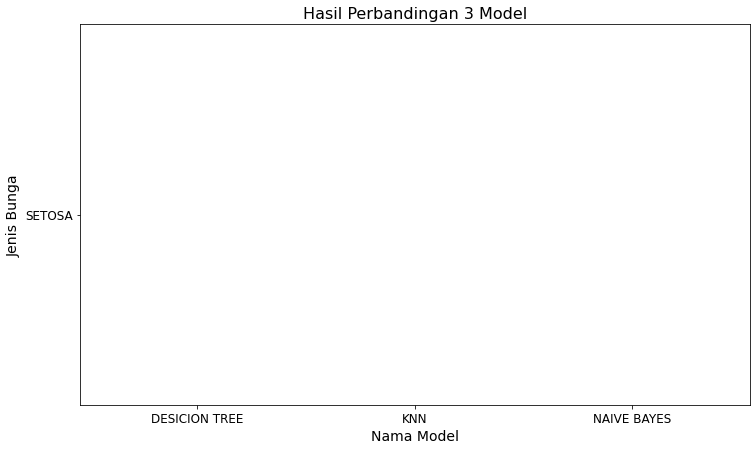

In [ ]:
        with open('dt_pickle', 'rb') as r:
            data1 = pickle.load(r)
        with open('knnA_pickle', 'rb') as r:
            data2 = pickle.load(r)
        with open('nb_pickle', 'rb') as r:
            data3 = pickle.load(r)

        # sl = float(request.form['sl'])
        # sw = float(request.form['sw'])
        # pl = float(request.form['pl'])
        # pw = float(request.form['pw'])
        # 5.1	3.5	1.4	0.2	
        sl = 5.1
        sw = 3.5
        pl = 1.4
        pw = 0.2

        datas = np.array((sl,sw,pl,pw))
        datas = np.reshape(datas, (1, -1))

        dt = data1.predict(datas)
        knn = data2.predict(datas)
        nb = data3.predict(datas)
        MataKuliah = ['DESICION TREE','KNN','NAIVE BAYES']
        dt1 =data(dt)
        nb1 =data(nb)
        knn1=data(knn)
        Nilai = [dt1, knn1, nb1]

        fig= plt.figure(figsize=(12,7))
        plt.bar(MataKuliah, Nilai, color='lightcoral')

        plt.title('Hasil Perbandingan 3 Model', size=16)
        plt.ylabel('Jenis Bunga', size=14)
        plt.xlabel('Nama Model', size=14)
        plt.xticks(size=12)
        plt.yticks(size=12)
        # return fig

In [ ]:
def get_boundaries():
  low_limit = [1,2,3]
  high_limit = [1]
  return low_limit, high_limit


low, high = get_boundaries()

a=low[0]
b=low[1]
c=low[2]

data4= data(a)
data1=data(b)
data3=data(c)
print(data4)
print(data1)
print(data3)


SETOSA
VERSICOLOR
VIRGINICA


In [19]:
def data1 ():
  a=1
  b=2
  c=2
  nilai=[a,b,c]
  return nilai

d,e,f = data1()
import numpy as np
a=1
b=2
c=2
data= np.array((a,b,c))
data= np.reshape(data, (1, -1))
print(data)
print(e)
print(f)

[[1 2 2]]
2
2
